In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
import sys, os
import pickle
import imageio
import numpy as np
from skimage import measure

# sys.path.append('../')
# from fastai.conv_learner import *
from fastai.dataset import *

from pathlib import Path
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects

# check to make sure you set the device
# cuda_id = 1
# torch.cuda.set_device(cuda_id)

import pylab as p
from pylab import rcParams
rcParams['figure.figsize'] = 11, 11
rcParams.update({'font.size': 22})

In [4]:
############ Useful paths
# path1='data/boxnet/trainingdata/'
# files_list = os.listdir(path1)
# path2 = 'data/boxnet/trainingdata2/'
# path3 = 'data/boxnet/labels/'
path4 = 'data/boxnet/results/'
# PATH = Path('data/boxnet')
# IMAGES = 'trainingdata2'

In [5]:
version = "23"
# lambda_4a = "0.001"
# lambda_5a = "0.001"
# lambda_4b = "3e-05"
lambda_5b = "200.0"
lambda_4c = "1.0"
# lambda_5c = "0.0003"

# Target

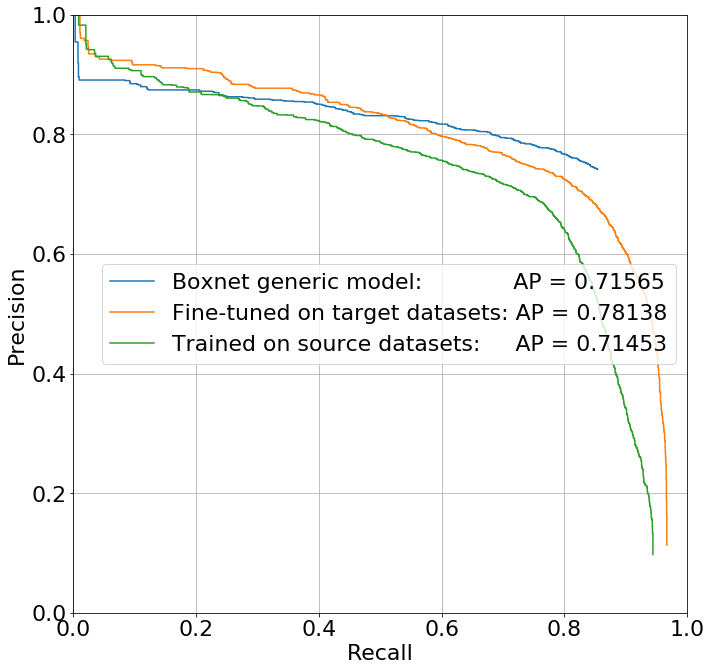

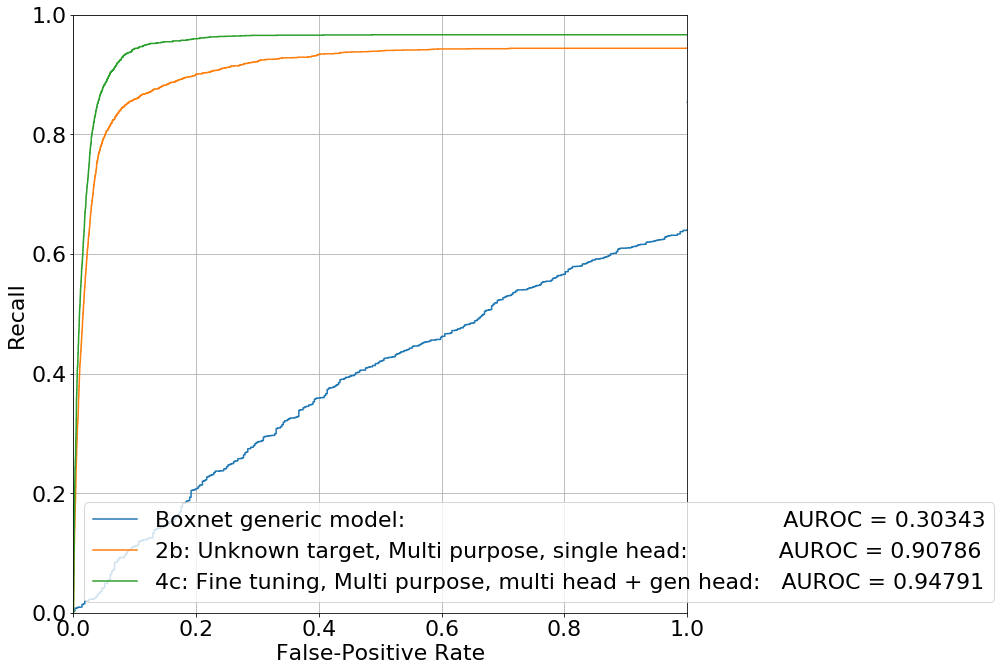

In [7]:
# with open(path4+'SSPicker_'+version+'_2a_target_spec_rec2.pickle', 'rb') as handle:
#     rec2_2a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_target_spec_prec2.pickle', 'rb') as handle:
#     prec2_2a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_target_spec_fpr2.pickle', 'rb') as handle:
#     fpr2_2a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_target_spec_rec3.pickle', 'rb') as handle:
#     rec3_2a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_target_spec_avgs2.pickle', 'rb') as handle:
#     avgs2_2a = pickle.load(handle)
    
with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_target_spec_rec2.pickle', 'rb') as handle:
    rec2_4c = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_target_spec_prec2.pickle', 'rb') as handle:
    prec2_4c = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_target_spec_fpr2.pickle', 'rb') as handle:
    fpr2_4c = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_target_spec_rec3.pickle', 'rb') as handle:
    rec3_4c = pickle.load(handle)
    
# with open(path4+'SSPicker_'+version+'_2b_target_gen_rec2.pickle', 'rb') as handle:
#     rec2_2b = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2b_target_gen_prec2.pickle', 'rb') as handle:
#     prec2_2b = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2b_target_gen_fpr2.pickle', 'rb') as handle:
#     fpr2_2b = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2b_target_gen_rec3.pickle', 'rb') as handle:
#     rec3_2b = pickle.load(handle)
# # with open(path4+'SSPicker_'+version+'_2b_target_gen_avgs2.pickle', 'rb') as handle:
# #     avgs2_2b = pickle.load(handle) 

with open(path4+'SSPicker_'+version+'_2b_target_gen_rec2.pickle', 'rb') as handle:
    rec2_2b = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_2b_target_gen_prec2.pickle', 'rb') as handle:
    prec2_2b = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_2b_target_gen_fpr2.pickle', 'rb') as handle:
    fpr2_2b = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_2b_target_gen_rec3.pickle', 'rb') as handle:
    rec3_2b = pickle.load(handle)
# # with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_target_gen_avgs2.pickle', 'rb') as handle:
# #     avgs2_4b = pickle.load(handle)

with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_rec2.pickle', 'rb') as handle:
    rec2_5b = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_prec2.pickle', 'rb') as handle:
    prec2_5b = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_fpr2.pickle', 'rb') as handle:
    fpr2_5b = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_rec3.pickle', 'rb') as handle:
    rec3_5b = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_avgs2.pickle', 'rb') as handle:
#     avgs2_5b = pickle.load(handle)

fig = p.figure()
ax = fig.gca()
ax.set_autoscale_on(False)
# ax.plot(rec2_2b, prec2_2b, label='Trained on target datasets only')
ax.plot(rec2_5b, prec2_5b, label='Boxnet generic model:             AP = 0.71565')
# ax.plot(rec2_2a, prec2_2a, label='Known target, Multi purpose, single head:                  AP = 0.8871')
ax.plot(rec2_4c, prec2_4c, label='Fine-tuned on target datasets: AP = 0.78138')
ax.plot(rec2_2b, prec2_2b, label='Trained on source datasets:     AP = 0.71453')
# ax.plot(rec2_5b, prec2_5b, label='Unknown target, Multi purpose, multi head + gen head:   AP = 0.8588')
ax.axis([0,1,0,1])
ax.set(xlabel='Recall', ylabel='Precision')
ax.grid()
ax.legend()

fig = p.figure()
ax = fig.gca()
ax.set_autoscale_on(False)
ax.plot(fpr2_5b, rec3_5b, label='Boxnet generic model:                                                      AUROC = 0.30343')
ax.plot(fpr2_2b, rec3_2b, label='2b: Unknown target, Multi purpose, single head:             AUROC = 0.90786')
# ax.plot(fpr2_2a, rec3_2a, label='Known target, Multi purpose, single head:                AUROC = 0.9696')
ax.plot(fpr2_4c, rec3_4c, label='4c: Fine tuning, Multi purpose, multi head + gen head:   AUROC = 0.94791')
# ax.plot(rec2_4b, rec3_4b, label='4b: Unknown target, Multi purpose, multi head + gen head')
# ax.plot(fpr2_5b, rec3_5b, label='Unknown target, Multi purpose, multi head + gen head: AUROC = 0.94509')
ax.axis([0,1,0,1])
ax.set(xlabel='False-Positive Rate', ylabel='Recall')
ax.grid()
ax.legend()

In [60]:
with open(path4+'SSPicker_'+version+'_2b_target_gen_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_2b_target_gen_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_2b_target_gen_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_2b_target_gen_auroc.pickle', 'rb') as handle:
    auroc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2b_target_gen_avgdis_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2b_target_gen_avgdis_at_rec10.pickle', 'rb') as handle:
#     avgdis_at_rec10 = pickle.load(handle)
print('Trained on target datasets only:')
print("AP:                          ", auc)
print("Precision at recall=90:      ", prec_at_rec90)
print("Recall at precision=90:      ", rec_at_prec90)
print("AROC:                        ", auroc)
# print("AUC of avg distances:        ", avgdis_auc)
# print("Avg distance at recall=10:   ", avgdis_at_rec10)
print("\n")

with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_target_gen_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_target_gen_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_target_gen_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_target_gen_auroc.pickle', 'rb') as handle:
    auroc = pickle.load(handle)
# # with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_target_gen_avgdis_auc.pickle', 'rb') as handle:
# #     avgdis_auc = pickle.load(handle)
# # with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_target_gen_avgdis_at_rec10.pickle', 'rb') as handle:
# #     avgdis_at_rec10 = pickle.load(handle)
print('Trained on source datasets:')
print("AP:                          ", auc)
print("Precision at recall=90:      ", prec_at_rec90)
print("Recall at precision=90:      ", rec_at_prec90)
print("AROC:                        ", auroc)
# # print("AUC of avg distances:        ", avgdis_auc)
# # print("Avg distance at recall=10:   ", avgdis_at_rec10)
print("\n")

# with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_auc.pickle', 'rb') as handle:
#     auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_prec_at_rec90.pickle', 'rb') as handle:
#     prec_at_rec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_rec_at_prec90.pickle', 'rb') as handle:
#     rec_at_prec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_auroc.pickle', 'rb') as handle:
#     auroc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_avgdis_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_avgdis_at_rec10.pickle', 'rb') as handle:
#     avgdis_at_rec10 = pickle.load(handle)
# print('5b: Unknown target, Multi purpose, multi head + avg head')
# print("AP:                          ", auc)
# print("Precision at recall=90:      ", prec_at_rec90)
# print("Recall at precision=90:      ", rec_at_prec90)
# print("AROC:                        ", auroc)
# # print("AUC of avg distances:        ", avgdis_auc)
# # print("Avg distance at recall=10:   ", avgdis_at_rec10)
# print("\n")
####################################################################################################

# with open(path4+'SSPicker_'+version+'_2a_target_spec_auc.pickle', 'rb') as handle:
#     auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_target_spec_prec_at_rec90.pickle', 'rb') as handle:
#     prec_at_rec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_target_spec_rec_at_prec90.pickle', 'rb') as handle:
#     rec_at_prec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_target_spec_auroc.pickle', 'rb') as handle:
#     auroc = pickle.load(handle)
# # with open(path4+'SSPicker_'+version+'_2a_target_spec_avgdis_auc.pickle', 'rb') as handle:
# #     avgdis_auc = pickle.load(handle)
# # with open(path4+'SSPicker_'+version+'_2a_target_spec_avgdis_at_rec10.pickle', 'rb') as handle:
# #     avgdis_at_rec10 = pickle.load(handle)
# print('2a: Known target, Multi purpose, single head')
# print("AP:                          ", auc)
# print("Precision at recall=90:      ", prec_at_rec90)
# print("Recall at precision=90:      ", rec_at_prec90)
# print("AROC:                        ", auroc)
# # print("AUC of avg distances:        ", avgdis_auc)
# # # print("Avg distance at recall=10:   ", avgdis_at_rec10)
# print("\n")

with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_target_spec_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_target_spec_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_target_spec_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_target_spec_auroc.pickle', 'rb') as handle:
    auroc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_target_spec_avgdis_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_target_spec_avgdis_at_rec10.pickle', 'rb') as handle:
#     avgdis_at_rec10 = pickle.load(handle)
print('Fine-tuned on target datasets:')
print("AP:                          ", auc)
print("Precision at recall=90:      ", prec_at_rec90)
print("Recall at precision=90:      ", rec_at_prec90)
print("AROC:                        ", auroc)
# print("AUC of avg distances:        ", avgdis_auc)
# print("Avg distance at recall=10:   ", avgdis_at_rec10)
print("\n")

Trained on target datasets only:
AP:                           0.6811458591625665
Precision at recall=90:       0.3527063758540545
Recall at precision=90:       0.06692634560906516
AROC:                         0.9036267554718144


Trained on source datasets:
AP:                           0.7145304587121699
Precision at recall=90:       0.34277238403452
Recall at precision=90:       0.11012747875354108
AROC:                         0.9129228830465633


Fine-tuned on target datasets:
AP:                           0.7813836731421797
Precision at recall=90:       0.6017330691026717
Recall at precision=90:       0.24291784702549576
AROC:                         0.9479098027180236




# Source

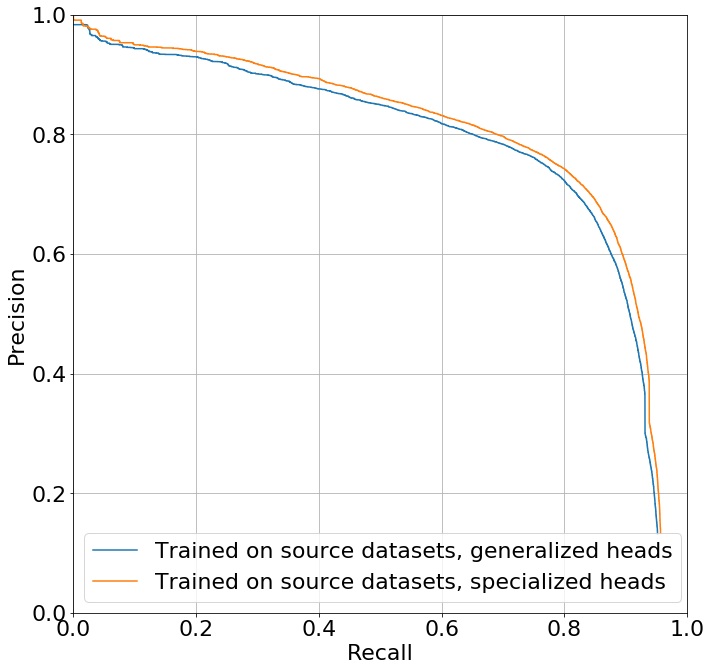

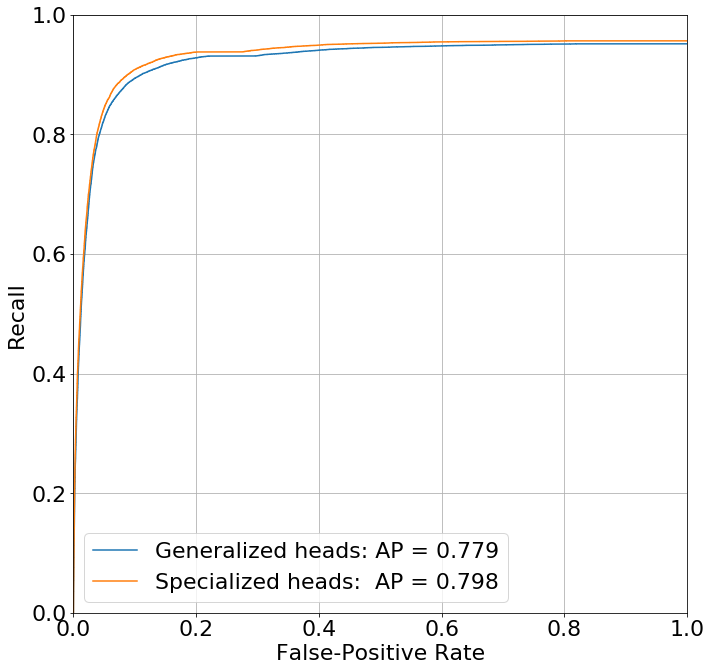

In [21]:
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_source_gen_rec2.pickle', 'rb') as handle:
    rec2_4b_gen = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_source_gen_prec2.pickle', 'rb') as handle:
    prec2_4b_gen = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_source_gen_fpr2.pickle', 'rb') as handle:
    fpr2_4b_gen = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_source_gen_rec3.pickle', 'rb') as handle:
    rec3_4b_gen = pickle.load(handle)
# # with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_target_gen_avgs2.pickle', 'rb') as handle:
# #     avgs2_4b = pickle.load(handle)

with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_source_spec_rec2.pickle', 'rb') as handle:
    rec2_4b_spec = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_source_spec_prec2.pickle', 'rb') as handle:
    prec2_4b_spec = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_source_spec_fpr2.pickle', 'rb') as handle:
    fpr2_4b_spec = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_source_spec_rec3.pickle', 'rb') as handle:
    rec3_4b_spec = pickle.load(handle)
# # with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_target_gen_avgs2.pickle', 'rb') as handle:
# #     avgs2_4b = pickle.load(handle)


# with open(path4+'SSPicker_'+version+'_1a_target_spec_rec2.pickle', 'rb') as handle:
#     rec2_1a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_1a_target_spec_prec2.pickle', 'rb') as handle:
#     prec2_1a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_1a_target_spec_avgs2.pickle', 'rb') as handle:
#     avgs2_1a = pickle.load(handle)

# with open(path4+'SSPicker_'+version+'_2a_target_spec_rec2.pickle', 'rb') as handle:
#     rec2_2a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_target_spec_prec2.pickle', 'rb') as handle:
#     prec2_2a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_target_spec_avgs2.pickle', 'rb') as handle:
#     avgs2_2a = pickle.load(handle)
    
# with open(path4+'SSPicker_'+version+'_3a_target_spec_rec2.pickle', 'rb') as handle:
#     rec2_3a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_3a_target_spec_prec2.pickle', 'rb') as handle:
#     prec2_3a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_3a_target_spec_avgs2.pickle', 'rb') as handle:
#     avgs2_3a = pickle.load(handle)

# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_target_spec_rec2.pickle', 'rb') as handle:
#     rec2_4a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_target_spec_prec2.pickle', 'rb') as handle:
#     prec2_4a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_target_spec_avgs2.pickle', 'rb') as handle:
#     avgs2_4a = pickle.load(handle)

# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_target_spec_rec2.pickle', 'rb') as handle:
#     rec2_5a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_target_spec_prec2.pickle', 'rb') as handle:
#     prec2_5a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_target_spec_avgs2.pickle', 'rb') as handle:
#     avgs2_5a = pickle.load(handle)

# with open(path4+'SSPicker_'+version+'_3c_target_spec_rec2.pickle', 'rb') as handle:
#     rec2_3c = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_3c_target_spec_prec2.pickle', 'rb') as handle:
#     prec2_3c = pickle.load(handle)
# # with open(path4+'SSPicker_'+version+'_3c_target_spec_avgs2.pickle', 'rb') as handle:
# #     avgs2_3c = pickle.load(handle)

# with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_target_spec_rec2.pickle', 'rb') as handle:
#     rec2_4c = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_target_spec_prec2.pickle', 'rb') as handle:
#     prec2_4c = pickle.load(handle)
# # with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_target_spec_avgs2.pickle', 'rb') as handle:
# #     avgs2_4c = pickle.load(handle)

# with open(path4+'SSPicker_'+version+'_5c_'+lambda_5c+'_target_spec_rec2.pickle', 'rb') as handle:
#     rec2_5c = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5c_'+lambda_5c+'_target_spec_prec2.pickle', 'rb') as handle:
#     prec2_5c = pickle.load(handle)
# # with open(path4+'SSPicker_'+version+'_5c_'+lambda_5c+'_target_spec_avgs2.pickle', 'rb') as handle:
# #     avgs2_5c = pickle.load(handle)
    
fig = p.figure()
ax = fig.gca()
ax.set_autoscale_on(False)
# ax.plot(rec2_1a, prec2_1a, label='1a: Known target, Single purpose, single head')
# ax.plot(rec2_2a, prec2_2a, label='2a: Known target, Multi purpose, single head')
# ax.plot(rec2_2a, prec2_2a, label='Known target, Multi purpose, single head')
# ax.plot(rec2_3a, prec2_3a, label='3a: Known target, Multi purpose, multi head')
# ax.plot(rec2_4a, prec2_4a, label='4a:  Known target, Multi purpose, multi head + gen head')
# ax.plot(rec2_5a, prec2_5a, label='5a:  Known target, Multi purpose, multi head + avg head')
ax.plot(rec2_4b_gen, prec2_4b_gen, label='Trained on source datasets, generalized heads')
ax.plot(rec2_4b_spec, prec2_4b_spec, label='Trained on source datasets, specialized heads')
# ax.plot(rec2_3c, prec2_3c, label='3c: Fine tuning, Multi purpose, multi head')
# ax.plot(rec2_4c, prec2_4c, label='4c:  Fine tuning, Multi purpose, multi head + gen head')
# ax.plot(rec2_4c, prec2_4c, label='Fine tuning, Multi purpose, multi head + gen head')
# ax.plot(rec2_5c, prec2_5c, label='5c:  Fine tuning, Multi purpose, multi head + avg head')
ax.axis([0,1,0,1])
# ax.set(xlabel='Recall', ylabel='Precision',
#        title='Known target (10078)')
ax.set(xlabel='Recall', ylabel='Precision')
ax.grid()
ax.legend()

fig = p.figure()
ax = fig.gca()
ax.set_autoscale_on(False)
# # ax.plot(rec2_1a, avgs2_1a, label='1a: Known target, Single purpose, single head')
# # ax.plot(rec2_2a, avgs2_2a, label='2a: Known target, Multi purpose, single head')
# # ax.plot(rec2_3a, avgs2_3a, label='3a: Known target, Multi purpose, multi head')
# # ax.plot(rec2_4a, avgs2_4a, label='4a:  Known target, Multi purpose, multi head + gen head')
# # ax.plot(rec2_5a, avgs2_5a, label='5a:  Known target, Multi purpose, multi head + avg head')
# ax.plot(rec2_3c, avgs2_3c, label='3c: Fine tuning, Multi purpose, multi head')
# ax.plot(rec2_4c, avgs2_4c, label='4c:  Fine tuning, Multi purpose, multi head + gen head')
# ax.plot(rec2_5c, avgs2_5c, label='5c:  Fine tuning, Multi purpose, multi head + avg head')
ax.plot(fpr2_4b_gen, rec3_4b_gen, label='Generalized heads: AP = 0.779')
ax.plot(fpr2_4b_spec, rec3_4b_spec, label='Specialized heads:  AP = 0.798')
ax.axis([0,1,0,1])
ax.set(xlabel='False-Positive Rate', ylabel='Recall')
ax.grid()
ax.legend()

In [52]:
# with open(path4+'SSPicker_'+version+'_1a_target_spec_auc.pickle', 'rb') as handle:
#     auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_1a_target_spec_prec_at_rec90.pickle', 'rb') as handle:
#     prec_at_rec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_1a_target_spec_rec_at_prec90.pickle', 'rb') as handle:
#     rec_at_prec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_1a_target_spec_avgdis_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_1a_target_spec_avgdis_at_rec10.pickle', 'rb') as handle:
#     avgdis_at_rec10 = pickle.load(handle)
# print('1a: Known target, Single purpose, single head')
# print("AUC:                         ", auc)
# print("Precision at recall=90:      ", prec_at_rec90)
# print("Recall at precision=90:      ", rec_at_prec90)
# print("AUC of avg distances:        ", avgdis_auc)
# # print("Avg distance at recall=10:   ", avgdis_at_rec10)
# print("\n")

# with open(path4+'SSPicker_'+version+'_2a_target_spec_auc.pickle', 'rb') as handle:
#     auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_target_spec_prec_at_rec90.pickle', 'rb') as handle:
#     prec_at_rec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_target_spec_rec_at_prec90.pickle', 'rb') as handle:
#     rec_at_prec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_target_spec_avgdis_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_target_spec_avgdis_at_rec10.pickle', 'rb') as handle:
#     avgdis_at_rec10 = pickle.load(handle)
# print('2a: Known target, Multi purpose, single head')
# print("AUC:                         ", auc)
# print("Precision at recall=90:      ", prec_at_rec90)
# print("Recall at precision=90:      ", rec_at_prec90)
# print("AUC of avg distances:        ", avgdis_auc)
# # print("Avg distance at recall=10:   ", avgdis_at_rec10)
# print("\n")

# with open(path4+'SSPicker_'+version+'_3a_target_spec_auc.pickle', 'rb') as handle:
#     auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_3a_target_spec_prec_at_rec90.pickle', 'rb') as handle:
#     prec_at_rec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_3a_target_spec_rec_at_prec90.pickle', 'rb') as handle:
#     rec_at_prec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_3a_target_spec_avgdis_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_3a_target_spec_avgdis_at_rec10.pickle', 'rb') as handle:
#     avgdis_at_rec10 = pickle.load(handle)
# print('3a: Known target, Multi purpose, multi head')
# print("AUC:                         ", auc)
# print("Precision at recall=90:      ", prec_at_rec90)
# print("Recall at precision=90:      ", rec_at_prec90)
# print("AUC of avg distances:        ", avgdis_auc)
# # print("Avg distance at recall=10:   ", avgdis_at_rec10)
# print("\n")

# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_target_spec_auc.pickle', 'rb') as handle:
#     auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_target_spec_prec_at_rec90.pickle', 'rb') as handle:
#     prec_at_rec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_target_spec_rec_at_prec90.pickle', 'rb') as handle:
#     rec_at_prec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_target_spec_avgdis_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_target_spec_avgdis_at_rec10.pickle', 'rb') as handle:
#     avgdis_at_rec10 = pickle.load(handle)
# print('4a:  Known target, Multi purpose, multi head + gen head')
# print("AUC:                         ", auc)
# print("Precision at recall=90:      ", prec_at_rec90)
# print("Recall at precision=90:      ", rec_at_prec90)
# print("AUC of avg distances:        ", avgdis_auc)
# # print("Avg distance at recall=10:   ", avgdis_at_rec10)
# print("\n")

# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_target_spec_auc.pickle', 'rb') as handle:
#     auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_target_spec_prec_at_rec90.pickle', 'rb') as handle:
#     prec_at_rec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_target_spec_rec_at_prec90.pickle', 'rb') as handle:
#     rec_at_prec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_target_spec_avgdis_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_target_spec_avgdis_at_rec10.pickle', 'rb') as handle:
#     avgdis_at_rec10 = pickle.load(handle)
# print('5a:  Known target, Multi purpose, multi head + avg head')
# print("AUC:                         ", auc)
# print("Precision at recall=90:      ", prec_at_rec90)
# print("Recall at precision=90:      ", rec_at_prec90)
# print("AUC of avg distances:        ", avgdis_auc)
# # print("Avg distance at recall=10:   ", avgdis_at_rec10)
# print("\n")

# with open(path4+'SSPicker_'+version+'_3c_target_spec_auc.pickle', 'rb') as handle:
#     auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_3c_target_spec_prec_at_rec90.pickle', 'rb') as handle:
#     prec_at_rec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_3c_target_spec_rec_at_prec90.pickle', 'rb') as handle:
#     rec_at_prec90 = pickle.load(handle)
# # with open(path4+'SSPicker_'+version+'_3c_target_spec_avgdis_auc.pickle', 'rb') as handle:
# #     avgdis_auc = pickle.load(handle)
# # with open(path4+'SSPicker_'+version+'_3c_target_spec_avgdis_at_rec10.pickle', 'rb') as handle:
# #     avgdis_at_rec10 = pickle.load(handle)
# print('3c: Fine tuning, Multi purpose, multi head')
# print("AUC:                         ", auc)
# print("Precision at recall=90:      ", prec_at_rec90)
# print("Recall at precision=90:      ", rec_at_prec90)
# # print("AUC of avg distances:        ", avgdis_auc)
# # print("Avg distance at recall=10:   ", avgdis_at_rec10)
# print("\n")

# with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_target_spec_auc.pickle', 'rb') as handle:
#     auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_target_spec_prec_at_rec90.pickle', 'rb') as handle:
#     prec_at_rec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_target_spec_rec_at_prec90.pickle', 'rb') as handle:
#     rec_at_prec90 = pickle.load(handle)
# # with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_target_spec_avgdis_auc.pickle', 'rb') as handle:
# #     avgdis_auc = pickle.load(handle)
# # with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_target_spec_avgdis_at_rec10.pickle', 'rb') as handle:
# #     avgdis_at_rec10 = pickle.load(handle)
# print('4c:  Fine tuning, Multi purpose, multi head + gen head')
# print("AUC:                         ", auc)
# print("Precision at recall=90:      ", prec_at_rec90)
# print("Recall at precision=90:      ", rec_at_prec90)
# # print("AUC of avg distances:        ", avgdis_auc)
# # print("Avg distance at recall=10:   ", avgdis_at_rec10)
# print("\n")

# with open(path4+'SSPicker_'+version+'_5c_'+lambda_5c+'_target_spec_auc.pickle', 'rb') as handle:
#     auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5c_'+lambda_5c+'_target_spec_prec_at_rec90.pickle', 'rb') as handle:
#     prec_at_rec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5c_'+lambda_5c+'_target_spec_rec_at_prec90.pickle', 'rb') as handle:
#     rec_at_prec90 = pickle.load(handle)
# # with open(path4+'SSPicker_'+version+'_5c_'+lambda_5c+'_target_spec_avgdis_auc.pickle', 'rb') as handle:
# #     avgdis_auc = pickle.load(handle)
# # with open(path4+'SSPicker_'+version+'_5c_'+lambda_5c+'_target_spec_avgdis_at_rec10.pickle', 'rb') as handle:
# #     avgdis_at_rec10 = pickle.load(handle)
# print('5c:  Fine tuning, Multi purpose, multi head + avg head')
# print("AUC:                         ", auc)
# print("Precision at recall=90:      ", prec_at_rec90)
# print("Recall at precision=90:      ", rec_at_prec90)
# # print("AUC of avg distances:        ", avgdis_auc)
# # print("Avg distance at recall=10:   ", avgdis_at_rec10)
# print("\n")

with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_source_gen_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_source_gen_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_source_gen_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_source_gen_auroc.pickle', 'rb') as handle:
    auroc = pickle.load(handle)
# # with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_target_gen_avgdis_auc.pickle', 'rb') as handle:
# #     avgdis_auc = pickle.load(handle)
# # with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_target_gen_avgdis_at_rec10.pickle', 'rb') as handle:
# #     avgdis_at_rec10 = pickle.load(handle)
print('Trained on source datasets, generalized heads')
print("AP:                          ", auc)
print("Precision at recall=90:      ", prec_at_rec90)
print("Recall at precision=90:      ", rec_at_prec90)
print("AROC:                        ", auroc)
# # print("AUC of avg distances:        ", avgdis_auc)
# # print("Avg distance at recall=10:   ", avgdis_at_rec10)
print("\n")

with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_source_spec_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_source_spec_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_source_spec_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_source_spec_auroc.pickle', 'rb') as handle:
    auroc = pickle.load(handle)
# # with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_target_gen_avgdis_auc.pickle', 'rb') as handle:
# #     avgdis_auc = pickle.load(handle)
# # with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_target_gen_avgdis_at_rec10.pickle', 'rb') as handle:
# #     avgdis_at_rec10 = pickle.load(handle)
print('Trained on source datasets, specialized heads')
print("AP:                          ", auc)
print("Precision at recall=90:      ", prec_at_rec90)
print("Recall at precision=90:      ", rec_at_prec90)
print("AROC:                        ", auroc)
# # print("AUC of avg distances:        ", avgdis_auc)
# # print("Avg distance at recall=10:   ", avgdis_at_rec10)
print("\n")

Trained on source datasets, generalized heads
AP:                           0.7793052846300198
Precision at recall=90:       0.5278263003729011
Recall at precision=90:       0.30870697463768115
AROC:                         0.9218753998715195


Trained on source datasets, specialized heads
AP:                           0.7975559109545135
Precision at recall=90:       0.5827736884847423
Recall at precision=90:       0.36231884057971014
AROC:                         0.9302713518480524




# Gen head on known target 10078

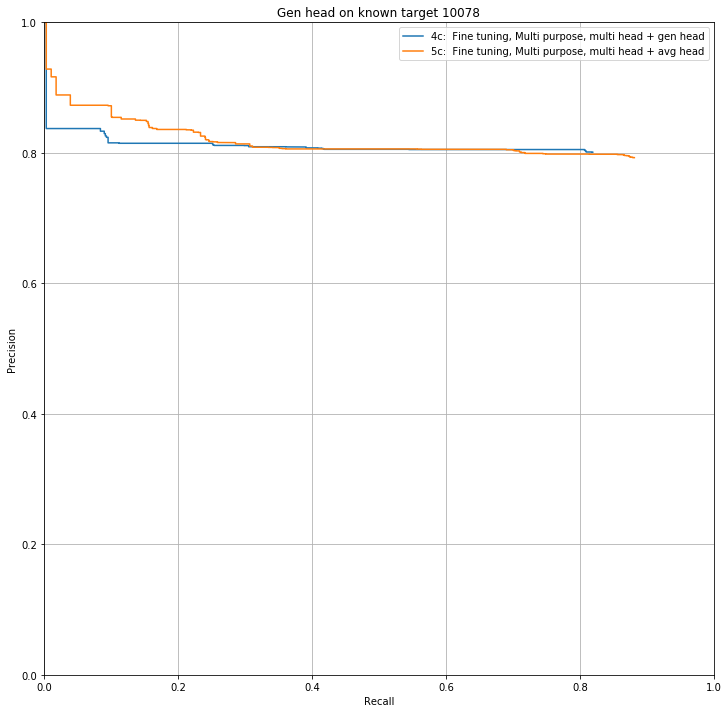

In [29]:
# with open(path4+'SSPicker_'+version+'_2a_10078_rec2.pickle', 'rb') as handle:
#     rec2_2a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_10078_prec2.pickle', 'rb') as handle:
#     prec2_2a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_10078_avgs2.pickle', 'rb') as handle:
#     avgs2_2a = pickle.load(handle)
    
# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_10078gen_rec2.pickle', 'rb') as handle:
#     rec2_4a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_10078gen_prec2.pickle', 'rb') as handle:
#     prec2_4a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_10078gen_avgs2.pickle', 'rb') as handle:
#     avgs2_4a = pickle.load(handle)

# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_10078gen_rec2.pickle', 'rb') as handle:
#     rec2_5a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_10078gen_prec2.pickle', 'rb') as handle:
#     prec2_5a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_10078gen_avgs2.pickle', 'rb') as handle:
#     avgs2_5a = pickle.load(handle)

with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_10078gen_rec2.pickle', 'rb') as handle:
    rec2_4c = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_10078gen_prec2.pickle', 'rb') as handle:
    prec2_4c = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_10078gen_avgs2.pickle', 'rb') as handle:
#     avgs2_4c = pickle.load(handle)

with open(path4+'SSPicker_'+version+'_5c_'+lambda_5c+'_10078gen_rec2.pickle', 'rb') as handle:
    rec2_5c = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5c_'+lambda_5c+'_10078gen_prec2.pickle', 'rb') as handle:
    prec2_5c = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5c_'+lambda_5c+'_10078gen_avgs2.pickle', 'rb') as handle:
#     avgs2_5c = pickle.load(handle)


fig = p.figure()
ax = fig.gca()
ax.set_autoscale_on(False)
# ax.plot(rec2_2a, prec2_2a, label='2a: Known target, Multi purpose, single head')
# ax.plot(rec2_4a, prec2_4a, label='4a:  Known target, Multi purpose, multi head + gen head')
# ax.plot(rec2_5a, prec2_5a, label='5a:  Known target, Multi purpose, multi head + avg head')
ax.plot(rec2_4c, prec2_4c, label='4c:  Fine tuning, Multi purpose, multi head + gen head')
ax.plot(rec2_5c, prec2_5c, label='5c:  Fine tuning, Multi purpose, multi head + avg head')
ax.axis([0,1,0,1])
ax.set(xlabel='Recall', ylabel='Precision',
       title='Gen head on known target 10078')
ax.grid()
ax.legend()

# fig = p.figure()
# ax = fig.gca()
# ax.set_autoscale_on(False)
# # ax.plot(rec2_2a, avgs2_2a, label='2a: Known target, Multi purpose, single head')
# # ax.plot(rec2_4a, avgs2_4a, label='4a:  Known target, Multi purpose, multi head + gen head')
# # ax.plot(rec2_5a, avgs2_5a, label='5a:  Known target, Multi purpose, multi head + avg head')
# ax.plot(rec2_4c, avgs2_4c, label='4c:  Fine tuning, Multi purpose, multi head + gen head')
# ax.plot(rec2_5c, avgs2_5c, label='5c:  Fine tuning, Multi purpose, multi head + avg head')
# ax.axis([0,1,0,1])
# ax.set(xlabel='Recall', ylabel='Average distance',
#        title='Gen head on known target 10078')
# ax.grid()
# ax.legend()

In [30]:
# with open(path4+'SSPicker_'+version+'_2a_10078_auc.pickle', 'rb') as handle:
#     auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_10078_prec_at_rec90.pickle', 'rb') as handle:
#     prec_at_rec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_10078_rec_at_prec90.pickle', 'rb') as handle:
#     rec_at_prec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_10078_avgdis_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_10078_avgdis_at_rec10.pickle', 'rb') as handle:
#     avgdis_at_rec10 = pickle.load(handle)
# print('2a: Known target, Multi purpose, single head')
# print("AUC:                         ", auc)
# print("Precision at recall=90:      ", prec_at_rec90)
# print("Recall at precision=90:      ", rec_at_prec90)
# print("AUC of avg distances:        ", avgdis_auc)
# # print("Avg distance at recall=10:   ", avgdis_at_rec10)
# print("\n")

# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_10078gen_auc.pickle', 'rb') as handle:
#     auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_10078gen_prec_at_rec90.pickle', 'rb') as handle:
#     prec_at_rec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_10078gen_rec_at_prec90.pickle', 'rb') as handle:
#     rec_at_prec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_10078gen_avgdis_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_10078gen_avgdis_at_rec10.pickle', 'rb') as handle:
#     avgdis_at_rec10 = pickle.load(handle)
# print('4a:  Known target, Multi purpose, multi head + gen head')
# print("AUC:                         ", auc)
# print("Precision at recall=90:      ", prec_at_rec90)
# print("Recall at precision=90:      ", rec_at_prec90)
# print("AUC of avg distances:        ", avgdis_auc)
# # print("Avg distance at recall=10:   ", avgdis_at_rec10)
# print("\n")

# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_10078gen_auc.pickle', 'rb') as handle:
#     auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_10078gen_prec_at_rec90.pickle', 'rb') as handle:
#     prec_at_rec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_10078gen_rec_at_prec90.pickle', 'rb') as handle:
#     rec_at_prec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_10078gen_avgdis_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_10078gen_avgdis_at_rec10.pickle', 'rb') as handle:
#     avgdis_at_rec10 = pickle.load(handle)
# print('5a:  Known target, Multi purpose, multi head + avg head')
# print("AUC:                         ", auc)
# print("Precision at recall=90:      ", prec_at_rec90)
# print("Recall at precision=90:      ", rec_at_prec90)
# print("AUC of avg distances:        ", avgdis_auc)
# # print("Avg distance at recall=10:   ", avgdis_at_rec10)
# print("\n")

with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_10078gen_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_10078gen_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_10078gen_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_10078gen_avgdis_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_10078gen_avgdis_at_rec10.pickle', 'rb') as handle:
#     avgdis_at_rec10 = pickle.load(handle)
print('4c:  Fine tuning, Multi purpose, multi head + gen head')
print("AUC:                         ", auc)
print("Precision at recall=90:      ", prec_at_rec90)
print("Recall at precision=90:      ", rec_at_prec90)
# print("AUC of avg distances:        ", avgdis_auc)
# print("Avg distance at recall=10:   ", avgdis_at_rec10)
print("\n")

with open(path4+'SSPicker_'+version+'_5c_'+lambda_5c+'_10078gen_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5c_'+lambda_5c+'_10078gen_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5c_'+lambda_5c+'_10078gen_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5c_'+lambda_5c+'_10078gen_avgdis_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5c_'+lambda_5c+'_10078gen_avgdis_at_rec10.pickle', 'rb') as handle:
#     avgdis_at_rec10 = pickle.load(handle)
print('5c:  Fine tuning, Multi purpose, multi head + avg head')
print("AUC:                         ", auc)
print("Precision at recall=90:      ", prec_at_rec90)
print("Recall at precision=90:      ", rec_at_prec90)
# print("AUC of avg distances:        ", avgdis_auc)
# print("Avg distance at recall=10:   ", avgdis_at_rec10)
print("\n")

4c:  Fine tuning, Multi purpose, multi head + gen head
AUC:                          0.6656223495259346
Precision at recall=90:       0.0
Recall at precision=90:       0.0032679738562091504


5c:  Fine tuning, Multi purpose, multi head + avg head
AUC:                          0.7230984112381842
Precision at recall=90:       0.0
Recall at precision=90:       0.017973856209150325




# Uknown target 10078

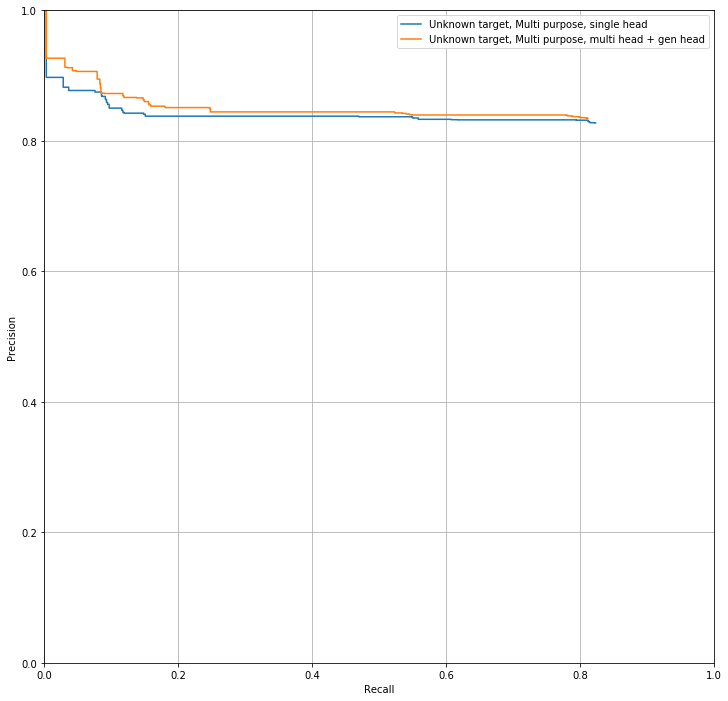

In [17]:
with open(path4+'SSPicker_'+version+'_2b_10078gen_rec2.pickle', 'rb') as handle:
    rec2_2b = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_2b_10078gen_prec2.pickle', 'rb') as handle:
    prec2_2b = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2b_10078gen_avgs2.pickle', 'rb') as handle:
#     avgs2_2b = pickle.load(handle) 

# with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_10078gen_rec2.pickle', 'rb') as handle:
#     rec2_4b = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_10078gen_prec2.pickle', 'rb') as handle:
#     prec2_4b = pickle.load(handle)
# # with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_10078gen_avgs2.pickle', 'rb') as handle:
# #     avgs2_4b = pickle.load(handle)

with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_10078gen_rec2.pickle', 'rb') as handle:
    rec2_5b = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_10078gen_prec2.pickle', 'rb') as handle:
    prec2_5b = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_10078gen_avgs2.pickle', 'rb') as handle:
#     avgs2_5b = pickle.load(handle)

fig = p.figure()
ax = fig.gca()
ax.set_autoscale_on(False)
# ax.plot(rec2_2b, prec2_2b, label='2b: Unknown target, Multi purpose, single head')
ax.plot(rec2_2b, prec2_2b, label='Unknown target, Multi purpose, single head')
# ax.plot(rec2_4b, prec2_4b, label='4b: Unknown target, Multi purpose, multi head + gen head')
# ax.plot(rec2_5b, prec2_5b, label='5b: Unknown target, Multi purpose, multi head + avg head')
ax.plot(rec2_5b, prec2_5b, label='Unknown target, Multi purpose, multi head + gen head')
ax.axis([0,1,0,1])
# ax.set(xlabel='Recall', ylabel='Precision',
#        title='Uknown target 10078')
ax.set(xlabel='Recall', ylabel='Precision')
ax.grid()
ax.legend()

# fig = p.figure()
# ax = fig.gca()
# ax.set_autoscale_on(False)
# ax.plot(rec2_2b, avgs2_2b, label='2b: Unknown target, Multi purpose, single head')
# ax.plot(rec2_4b, avgs2_4b, label='4b: Unknown target, Multi purpose, multi head + gen head')
# ax.plot(rec2_5b, avgs2_5b, label='5b: Unknown target, Multi purpose, multi head + avg head')
# ax.axis([0,1,0,1])
# ax.set(xlabel='Recall', ylabel='Average distance',
#        title='Uknown target 10078')
# ax.grid()
# ax.legend()

In [8]:
with open(path4+'SSPicker_'+version+'_2b_10078gen_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_2b_10078gen_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_2b_10078gen_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2b_10078gen_avgdis_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2b_10078gen_avgdis_at_rec10.pickle', 'rb') as handle:
#     avgdis_at_rec10 = pickle.load(handle)
print('2b: Unknown target, Multi purpose, single head')
print("AUC:                         ", auc)
print("Precision at recall=90:      ", prec_at_rec90)
print("Recall at precision=90:      ", rec_at_prec90)
# print("AUC of avg distances:        ", avgdis_auc)
# print("Avg distance at recall=10:   ", avgdis_at_rec10)
print("\n")

# with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_10078gen_auc.pickle', 'rb') as handle:
#     auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_10078gen_prec_at_rec90.pickle', 'rb') as handle:
#     prec_at_rec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_10078gen_rec_at_prec90.pickle', 'rb') as handle:
#     rec_at_prec90 = pickle.load(handle)
# # with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_10078gen_avgdis_auc.pickle', 'rb') as handle:
# #     avgdis_auc = pickle.load(handle)
# # with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_10078gen_avgdis_at_rec10.pickle', 'rb') as handle:
# #     avgdis_at_rec10 = pickle.load(handle)
# print('4b: Unknown target, Multi purpose, multi head + gen head')
# print("AUC:                         ", auc)
# print("Precision at recall=90:      ", prec_at_rec90)
# print("Recall at precision=90:      ", rec_at_prec90)
# # print("AUC of avg distances:        ", avgdis_auc)
# # print("Avg distance at recall=10:   ", avgdis_at_rec10)
# print("\n")

with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_10078gen_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_10078gen_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_10078gen_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_10078gen_avgdis_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_10078gen_avgdis_at_rec10.pickle', 'rb') as handle:
#     avgdis_at_rec10 = pickle.load(handle)
print('5b: Unknown target, Multi purpose, multi head + avg head')
print("AUC:                         ", auc)
print("Precision at recall=90:      ", prec_at_rec90)
print("Recall at precision=90:      ", rec_at_prec90)
# print("AUC of avg distances:        ", avgdis_auc)
# print("Avg distance at recall=10:   ", avgdis_at_rec10)
print("\n")

2b: Unknown target, Multi purpose, single head
AUC:                          0.6968605739766531
Precision at recall=90:       0.0
Recall at precision=90:       0.0032679738562091504


5b: Unknown target, Multi purpose, multi head + avg head
AUC:                          0.6932716211161747
Precision at recall=90:       0.0
Recall at precision=90:       0.03676470588235294




# Known multi-target

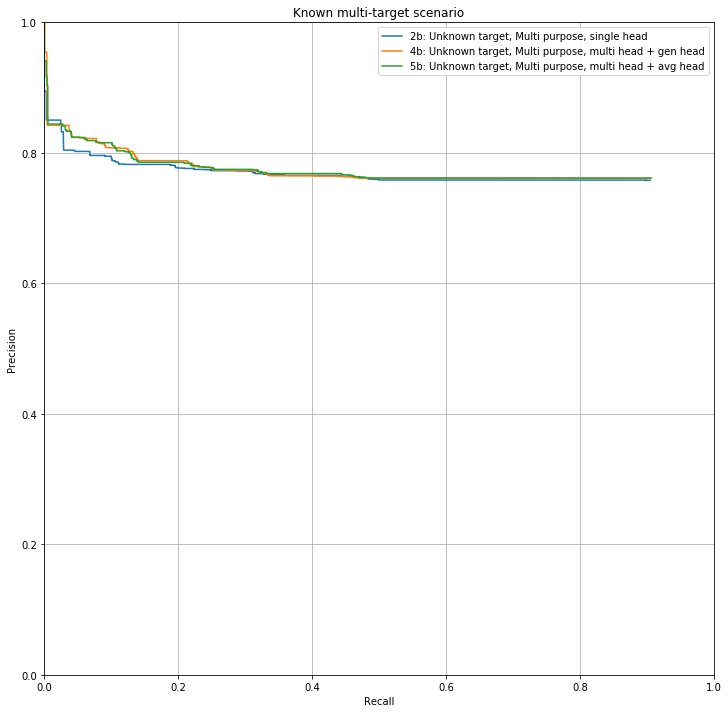

In [33]:
# with open(path4+'SSPicker_'+version+'_2a_all20_rec2.pickle', 'rb') as handle:
#     rec2_2a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_all20_prec2.pickle', 'rb') as handle:
#     prec2_2a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_all20_avgs2.pickle', 'rb') as handle:
#     avgs2_2a = pickle.load(handle)
    
# with open(path4+'SSPicker_'+version+'_3a_all20_rec2.pickle', 'rb') as handle:
#     rec2_3a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_3a_all20_prec2.pickle', 'rb') as handle:
#     prec2_3a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_3a_all20_avgs2.pickle', 'rb') as handle:
#     avgs2_3a = pickle.load(handle)
    
# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_all20_rec2.pickle', 'rb') as handle:
#     rec2_4a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_all20_prec2.pickle', 'rb') as handle:
#     prec2_4a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_all20_avgs2.pickle', 'rb') as handle:
#     avgs2_4a = pickle.load(handle)

# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_all20_rec2.pickle', 'rb') as handle:
#     rec2_5a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_all20_prec2.pickle', 'rb') as handle:
#     prec2_5a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_all20_avgs2.pickle', 'rb') as handle:
#     avgs2_5a = pickle.load(handle)

with open(path4+'SSPicker_'+version+'_2b_all20_rec2.pickle', 'rb') as handle:
    rec2_2b = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_2b_all20_prec2.pickle', 'rb') as handle:
    prec2_2b = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2b_all20_avgs2.pickle', 'rb') as handle:
#     avgs2_2b = pickle.load(handle)
    
# with open(path4+'SSPicker_'+version+'_3b_all20_rec2.pickle', 'rb') as handle:
#     rec2_3b = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_3b_all20_prec2.pickle', 'rb') as handle:
#     prec2_3b = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_3b_all20_avgs2.pickle', 'rb') as handle:
#     avgs2_3b = pickle.load(handle)
    
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_all20_rec2.pickle', 'rb') as handle:
    rec2_4b = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_all20_prec2.pickle', 'rb') as handle:
    prec2_4b = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_all20_avgs2.pickle', 'rb') as handle:
#     avgs2_4b = pickle.load(handle)

with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_all20_rec2.pickle', 'rb') as handle:
    rec2_5b = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_all20_prec2.pickle', 'rb') as handle:
    prec2_5b = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_all20_avgs2.pickle', 'rb') as handle:
#     avgs2_5b = pickle.load(handle)
    
fig = p.figure()
ax = fig.gca()
ax.set_autoscale_on(False)
# ax.plot(rec2_2a, prec2_2a, label='2a: Known target, Multi purpose, single head')
# ax.plot(rec2_3a, prec2_3a, label='3a: Known target, Multi purpose, multi head')
# ax.plot(rec2_4a, prec2_4a, label='4a: Known target, Multi purpose, multi head + gen head')
# ax.plot(rec2_5a, prec2_5a, label='5a: Known target, Multi purpose, multi head + avg head')
ax.plot(rec2_2b, prec2_2b, label='2b: Unknown target, Multi purpose, single head')
# ax.plot(rec2_3b, prec2_3b, label='3b: Unknown target, Multi purpose, multi head')
ax.plot(rec2_4b, prec2_4b, label='4b: Unknown target, Multi purpose, multi head + gen head')
ax.plot(rec2_5b, prec2_5b, label='5b: Unknown target, Multi purpose, multi head + avg head')
ax.axis([0,1,0,1])
ax.set(xlabel='Recall', ylabel='Precision',
       title='Known multi-target scenario')
ax.grid()
ax.legend()
    
# fig = p.figure()
# ax = fig.gca()
# ax.set_autoscale_on(False)
# # ax.plot(rec2_2a, avgs2_2a, label='2a: Known target, Multi purpose, single head')
# # ax.plot(rec2_3a, avgs2_3a, label='3a: Known target, Multi purpose, multi head')
# # ax.plot(rec2_4a, avgs2_4a, label='4a: Known target, Multi purpose, multi head + gen head')
# # ax.plot(rec2_5a, avgs2_5a, label='5a: Known target, Multi purpose, multi head + avg head')
# ax.plot(rec2_2b, avgs2_2b, label='2b: Unknown target, Multi purpose, single head')
# # ax.plot(rec2_3b, avgs2_3b, label='3b: Unknown target, Multi purpose, multi head')
# ax.plot(rec2_4b, avgs2_4b, label='4b: Unknown target, Multi purpose, multi head + gen head')
# ax.plot(rec2_5b, avgs2_5b, label='5b: Unknown target, Multi purpose, multi head + avg head')
# ax.axis([0,1,0,1])
# ax.set(xlabel='Recall', ylabel='Average distance',
#        title='Known multi-target scenario')
# ax.grid()
# ax.legend()

In [34]:
# with open(path4+'SSPicker_'+version+'_2a_all20_auc.pickle', 'rb') as handle:
#     auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_all20_prec_at_rec90.pickle', 'rb') as handle:
#     prec_at_rec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_all20_rec_at_prec90.pickle', 'rb') as handle:
#     rec_at_prec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_all20_avgdis_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_all20_avgdis_at_rec10.pickle', 'rb') as handle:
#     avgdis_at_rec10 = pickle.load(handle)
# print('2a: known target, Multi purpose, single head')
# print("AUC:                         ", auc)
# print("Precision at recall=90:      ", prec_at_rec90)
# print("Recall at precision=90:      ", rec_at_prec90)
# print("AUC of avg distances:        ", avgdis_auc)
# # print("Avg distance at recall=10:   ", avgdis_at_rec10)
# print("\n")

# with open(path4+'SSPicker_'+version+'_3a_all20_auc.pickle', 'rb') as handle:
#     auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_3a_all20_prec_at_rec90.pickle', 'rb') as handle:
#     prec_at_rec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_3a_all20_rec_at_prec90.pickle', 'rb') as handle:
#     rec_at_prec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_3a_all20_avgdis_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_3a_all20_avgdis_at_rec10.pickle', 'rb') as handle:
#     avgdis_at_rec10 = pickle.load(handle)
# print('3a: known target, Multi purpose, multi head, no gen head')
# print("AUC:                         ", auc)
# print("Precision at recall=90:      ", prec_at_rec90)
# print("Recall at precision=90:      ", rec_at_prec90)
# print("AUC of avg distances:        ", avgdis_auc)
# # print("Avg distance at recall=10:   ", avgdis_at_rec10)
# print("\n")

# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_all20_auc.pickle', 'rb') as handle:
#     auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_all20_prec_at_rec90.pickle', 'rb') as handle:
#     prec_at_rec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_all20_rec_at_prec90.pickle', 'rb') as handle:
#     rec_at_prec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_all20_avgdis_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_all20_avgdis_at_rec10.pickle', 'rb') as handle:
#     avgdis_at_rec10 = pickle.load(handle)
# print('4a: known target, Multi purpose, multi head + gen head')
# print("AUC:                         ", auc)
# print("Precision at recall=90:      ", prec_at_rec90)
# print("Recall at precision=90:      ", rec_at_prec90)
# print("AUC of avg distances:        ", avgdis_auc)
# # print("Avg distance at recall=10:   ", avgdis_at_rec10)
# print("\n")

# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_all20_auc.pickle', 'rb') as handle:
#     auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_all20_prec_at_rec90.pickle', 'rb') as handle:
#     prec_at_rec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_all20_rec_at_prec90.pickle', 'rb') as handle:
#     rec_at_prec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_all20_avgdis_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_all20_avgdis_at_rec10.pickle', 'rb') as handle:
#     avgdis_at_rec10 = pickle.load(handle)
# print('5a: known target, Multi purpose, multi head + avg head')
# print("AUC:                         ", auc)
# print("Precision at recall=90:      ", prec_at_rec90)
# print("Recall at precision=90:      ", rec_at_prec90)
# print("AUC of avg distances:        ", avgdis_auc)
# # print("Avg distance at recall=10:   ", avgdis_at_rec10)
# print("\n")

# ####################

with open(path4+'SSPicker_'+version+'_2b_all20_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_2b_all20_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_2b_all20_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2b_all20_avgdis_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2b_all20_avgdis_at_rec10.pickle', 'rb') as handle:
#     avgdis_at_rec10 = pickle.load(handle)
print('2b: Unknown target, Multi purpose, single head')
print("AUC:                         ", auc)
print("Precision at recall=90:      ", prec_at_rec90)
print("Recall at precision=90:      ", rec_at_prec90)
# print("AUC of avg distances:        ", avgdis_auc)
# print("Avg distance at recall=10:   ", avgdis_at_rec10)
print("\n")

# with open(path4+'SSPicker_'+version+'_3b_all20_auc.pickle', 'rb') as handle:
#     auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_3b_all20_prec_at_rec90.pickle', 'rb') as handle:
#     prec_at_rec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_3b_all20_rec_at_prec90.pickle', 'rb') as handle:
#     rec_at_prec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_3b_all20_avgdis_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# # with open(path4+'SSPicker_'+version+'_3b_all20_avgdis_at_rec10.pickle', 'rb') as handle:
# #     avgdis_at_rec10 = pickle.load(handle)
# print('3b: Unknown target, Multi purpose, multi head, no gen head')
# print("AUC:                         ", auc)
# print("Precision at recall=90:      ", prec_at_rec90)
# print("Recall at precision=90:      ", rec_at_prec90)
# print("AUC of avg distances:        ", avgdis_auc)
# # print("Avg distance at recall=10:   ", avgdis_at_rec10)
# print("\n")

with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_all20_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_all20_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_all20_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_all20_avgdis_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_all20_avgdis_at_rec10.pickle', 'rb') as handle:
#     avgdis_at_rec10 = pickle.load(handle)
print('4b: Known target, Multi purpose, multi head + gen head')
print("AUC:                         ", auc)
print("Precision at recall=90:      ", prec_at_rec90)
print("Recall at precision=90:      ", rec_at_prec90)
# print("AUC of avg distances:        ", avgdis_auc)
# print("Avg distance at recall=10:   ", avgdis_at_rec10)
print("\n")

with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_all20_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_all20_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_all20_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_all20_avgdis_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_all20_avgdis_at_rec10.pickle', 'rb') as handle:
#     avgdis_at_rec10 = pickle.load(handle)
print('5b: Known target, Multi purpose, multi head + avg head')
print("AUC:                         ", auc)
print("Precision at recall=90:      ", prec_at_rec90)
print("Recall at precision=90:      ", rec_at_prec90)
# print("AUC of avg distances:        ", avgdis_auc)
# print("Avg distance at recall=10:   ", avgdis_at_rec10)
print("\n")

2b: Unknown target, Multi purpose, single head
AUC:                          0.6977701485467321
Precision at recall=90:       0.758067212840662
Recall at precision=90:       0.0003977724741447892


4b: Known target, Multi purpose, multi head + gen head
AUC:                          0.7027541951318202
Precision at recall=90:       0.7609821279438783
Recall at precision=90:       0.004574383452665076


5b: Known target, Multi purpose, multi head + avg head
AUC:                          0.7034182599672844
Precision at recall=90:       0.7615539182853316
Recall at precision=90:       0.00556881463802705




# Gen head on known multi-target

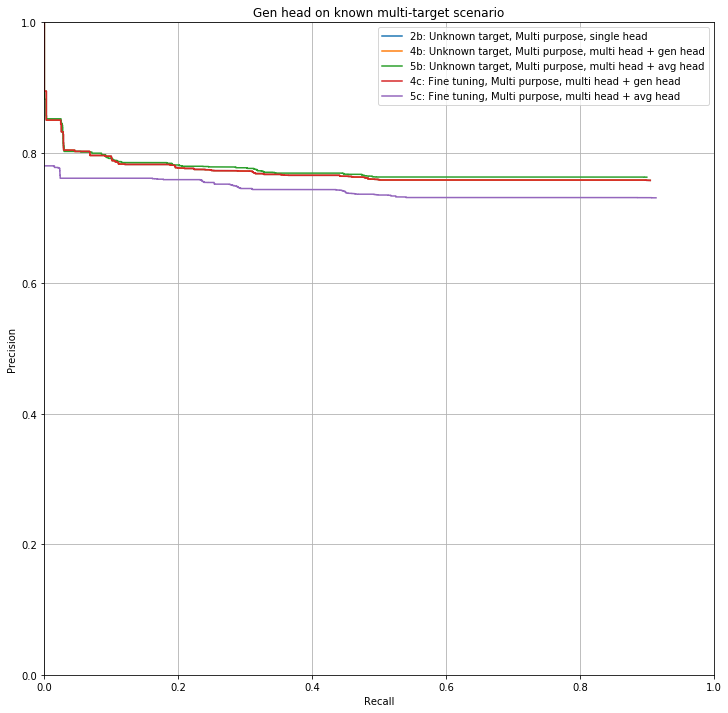

In [35]:
# with open(path4+'SSPicker_'+version+'_2a_all20_rec2.pickle', 'rb') as handle:
#     rec2_2a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_all20_prec2.pickle', 'rb') as handle:
#     prec2_2a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_all20_avgs2.pickle', 'rb') as handle:
#     avgs2_2a = pickle.load(handle)

# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_all20gen_rec2.pickle', 'rb') as handle:
#     rec2_4a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_all20gen_prec2.pickle', 'rb') as handle:
#     prec2_4a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_all20gen_avgs2.pickle', 'rb') as handle:
#     avgs2_4a = pickle.load(handle)

# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_all20gen_rec2.pickle', 'rb') as handle:
#     rec2_5a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_all20gen_prec2.pickle', 'rb') as handle:
#     prec2_5a = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_all20gen_avgs2.pickle', 'rb') as handle:
#     avgs2_5a = pickle.load(handle)

with open(path4+'SSPicker_'+version+'_2b_all20_rec2.pickle', 'rb') as handle:
    rec2_2b = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_2b_all20_prec2.pickle', 'rb') as handle:
    prec2_2b = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2b_all20_avgs2.pickle', 'rb') as handle:
#     avgs2_2b = pickle.load(handle)

with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_all20gen_rec2.pickle', 'rb') as handle:
    rec2_4b = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_all20gen_prec2.pickle', 'rb') as handle:
    prec2_4b = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_all20gen_avgs2.pickle', 'rb') as handle:
#     avgs2_4b = pickle.load(handle)

with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_all20gen_rec2.pickle', 'rb') as handle:
    rec2_5b = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_all20gen_prec2.pickle', 'rb') as handle:
    prec2_5b = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_all20gen_avgs2.pickle', 'rb') as handle:
#     avgs2_5b = pickle.load(handle)

with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_all20gen_rec2.pickle', 'rb') as handle:
    rec2_4c = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_all20gen_prec2.pickle', 'rb') as handle:
    prec2_4c = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_all20gen_avgs2.pickle', 'rb') as handle:
#     avgs2_4c = pickle.load(handle)

with open(path4+'SSPicker_'+version+'_5c_'+lambda_5c+'_all20gen_rec2.pickle', 'rb') as handle:
    rec2_5c = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5c_'+lambda_5c+'_all20gen_prec2.pickle', 'rb') as handle:
    prec2_5c = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5c_'+lambda_5c+'_all20gen_avgs2.pickle', 'rb') as handle:
#     avgs2_5c = pickle.load(handle)    

fig = p.figure()
ax = fig.gca()
ax.set_autoscale_on(False)
# ax.plot(rec2_2a, prec2_2a, label='2a: Known target, Multi purpose, single head')
# ax.plot(rec2_4a, prec2_4a, label='4a: Known target, Multi purpose, multi head + gen head')
# ax.plot(rec2_5a, prec2_5a, label='5a: Known target, Multi purpose, multi head + avg head')
ax.plot(rec2_2b, prec2_2b, label='2b: Unknown target, Multi purpose, single head')
ax.plot(rec2_4b, prec2_4b, label='4b: Unknown target, Multi purpose, multi head + gen head')
ax.plot(rec2_5b, prec2_5b, label='5b: Unknown target, Multi purpose, multi head + avg head')
ax.plot(rec2_4c, prec2_4c, label='4c: Fine tuning, Multi purpose, multi head + gen head')
ax.plot(rec2_5c, prec2_5c, label='5c: Fine tuning, Multi purpose, multi head + avg head')
ax.axis([0,1,0,1])
ax.set(xlabel='Recall', ylabel='Precision',
       title='Gen head on known multi-target scenario')
ax.grid()
ax.legend()
    
# fig = p.figure()
# ax = fig.gca()
# ax.set_autoscale_on(False)
# # ax.plot(rec2_2a, avgs2_2a, label='2a: Known target, Multi purpose, single head')
# # ax.plot(rec2_4a, avgs2_4a, label='4a: Known target, Multi purpose, multi head + gen head')
# # ax.plot(rec2_5a, avgs2_5a, label='5a: Known target, Multi purpose, multi head + avg head')
# ax.plot(rec2_2b, avgs2_2b, label='2b: Unknown target, Multi purpose, single head')
# ax.plot(rec2_4b, avgs2_4b, label='4b: Unknown target, Multi purpose, multi head + gen head')
# ax.plot(rec2_5b, avgs2_5b, label='5b: Unknown target, Multi purpose, multi head + avg head')
# ax.plot(rec2_4c, avgs2_4c, label='4c: Fine tuning, Multi purpose, multi head + gen head')
# ax.plot(rec2_5c, avgs2_5c, label='5c: Fine tuning, Multi purpose, multi head + avg head')
# ax.axis([0,1,0,1])
# ax.set(xlabel='Recall', ylabel='Average distance',
#        title='Gen head on known multi-target scenario')
# ax.grid()
# ax.legend()

In [36]:
# with open(path4+'SSPicker_'+version+'_2a_all20_auc.pickle', 'rb') as handle:
#     auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_all20_prec_at_rec90.pickle', 'rb') as handle:
#     prec_at_rec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_all20_rec_at_prec90.pickle', 'rb') as handle:
#     rec_at_prec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_all20_avgdis_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2a_all20_avgdis_at_rec10.pickle', 'rb') as handle:
#     avgdis_at_rec10 = pickle.load(handle)
# print('2a: known target, Multi purpose, single head')
# print("AUC:                         ", auc)
# print("Precision at recall=90:      ", prec_at_rec90)
# print("Recall at precision=90:      ", rec_at_prec90)
# print("AUC of avg distances:        ", avgdis_auc)
# # print("Avg distance at recall=10:   ", avgdis_at_rec10)
# print("\n")

# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_all20gen_auc.pickle', 'rb') as handle:
#     auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_all20gen_prec_at_rec90.pickle', 'rb') as handle:
#     prec_at_rec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_all20gen_rec_at_prec90.pickle', 'rb') as handle:
#     rec_at_prec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_all20gen_avgdis_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4a_'+lambda_4a+'_all20gen_avgdis_at_rec10.pickle', 'rb') as handle:
#     avgdis_at_rec10 = pickle.load(handle)
# print('4a: known target, Multi purpose, multi head + gen head')
# print("AUC:                         ", auc)
# print("Precision at recall=90:      ", prec_at_rec90)
# print("Recall at precision=90:      ", rec_at_prec90)
# print("AUC of avg distances:        ", avgdis_auc)
# # print("Avg distance at recall=10:   ", avgdis_at_rec10)
# print("\n")

# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_all20gen_auc.pickle', 'rb') as handle:
#     auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_all20gen_prec_at_rec90.pickle', 'rb') as handle:
#     prec_at_rec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_all20gen_rec_at_prec90.pickle', 'rb') as handle:
#     rec_at_prec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_all20gen_avgdis_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5a_'+lambda_5a+'_all20gen_avgdis_at_rec10.pickle', 'rb') as handle:
#     avgdis_at_rec10 = pickle.load(handle)
# print('5b: known target, Multi purpose, multi head + gen head')
# print("AUC:                         ", auc)
# print("Precision at recall=90:      ", prec_at_rec90)
# print("Recall at precision=90:      ", rec_at_prec90)
# print("AUC of avg distances:        ", avgdis_auc)
# # print("Avg distance at recall=10:   ", avgdis_at_rec10)
# print("\n")
# ####################

with open(path4+'SSPicker_'+version+'_2b_all20_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_2b_all20_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_2b_all20_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2b_all20_avgdis_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_2b_all20_avgdis_at_rec10.pickle', 'rb') as handle:
#     avgdis_at_rec10 = pickle.load(handle)
print('2b: Unknown target, Multi purpose, single head')
print("AUC:                         ", auc)
print("Precision at recall=90:      ", prec_at_rec90)
print("Recall at precision=90:      ", rec_at_prec90)
# print("AUC of avg distances:        ", avgdis_auc)
# print("Avg distance at recall=10:   ", avgdis_at_rec10)
print("\n")

with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_all20gen_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_all20gen_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_all20gen_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_all20gen_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_all20gen_avgdis_at_rec10.pickle', 'rb') as handle:
#     avgdis_at_rec10 = pickle.load(handle)
print('4b: unKnown target, Multi purpose, multi head + gen head')
print("AUC:                         ", auc)
print("Precision at recall=90:      ", prec_at_rec90)
print("Recall at precision=90:      ", rec_at_prec90)
# print("AUC of avg distances:        ", avgdis_auc)
# print("Avg distance at recall=10:   ", avgdis_at_rec10)
print("\n")

with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_all20gen_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_all20gen_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_all20gen_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_all20gen_avgdis_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_all20gen_avgdis_at_rec10.pickle', 'rb') as handle:
#     avgdis_at_rec10 = pickle.load(handle)
print('5b unKnown target, Multi purpose, multi head + gen head')
print("AUC:                         ", auc)
print("Precision at recall=90:      ", prec_at_rec90)
print("Recall at precision=90:      ", rec_at_prec90)
# print("AUC of avg distances:        ", avgdis_auc)
# print("Avg distance at recall=10:   ", avgdis_at_rec10)
print("\n")

with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_all20gen_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_all20gen_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_all20gen_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_all20gen_avgdis_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_all20gen_avgdis_at_rec10.pickle', 'rb') as handle:
#     avgdis_at_rec10 = pickle.load(handle)
print('4c: Fine tuning, Multi purpose, multi head + gen head')
print("AUC:                         ", auc)
print("Precision at recall=90:      ", prec_at_rec90)
print("Recall at precision=90:      ", rec_at_prec90)
# print("AUC of avg distances:        ", avgdis_auc)
# print("Avg distance at recall=10:   ", avgdis_at_rec10)
print("\n")

with open(path4+'SSPicker_'+version+'_5c_'+lambda_5c+'_all20gen_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5c_'+lambda_5c+'_all20gen_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5c_'+lambda_5c+'_all20gen_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5c_'+lambda_5c+'_all20gen_avgdis_auc.pickle', 'rb') as handle:
#     avgdis_auc = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5c_'+lambda_5c+'_all20gen_avgdis_at_rec10.pickle', 'rb') as handle:
#     avgdis_at_rec10 = pickle.load(handle)
print('5c: Fine tuning, Multi purpose, multi head + gen head')
print("AUC:                         ", auc)
print("Precision at recall=90:      ", prec_at_rec90)
print("Recall at precision=90:      ", rec_at_prec90)
# print("AUC of avg distances:        ", avgdis_auc)
# print("Avg distance at recall=10:   ", avgdis_at_rec10)
print("\n")
####################

2b: Unknown target, Multi purpose, single head
AUC:                          0.6977701485467321
Precision at recall=90:       0.758067212840662
Recall at precision=90:       0.0003977724741447892


4b: unKnown target, Multi purpose, multi head + gen head
AUC:                          0.6977701485467321
Precision at recall=90:       0.758067212840662
Recall at precision=90:       0.0003977724741447892


5b unKnown target, Multi purpose, multi head + gen head
AUC:                          0.697216680079365
Precision at recall=90:       0.7628518456093039
Recall at precision=90:       0.0003977724741447892


4c: Fine tuning, Multi purpose, multi head + gen head
AUC:                          0.6977701485467321
Precision at recall=90:       0.758067212840662
Recall at precision=90:       0.0003977724741447892


5c: Fine tuning, Multi purpose, multi head + gen head
AUC:                          0.6793410920612322
Precision at recall=90:       0.7314487632508834
Recall at precision=90:       

# auc calculation test

In [37]:
# rec_2b = np.load("SSPicker_"+version+"_2b_" + "recall.npy")
# prec_2b = np.load("SSPicker_"+version+"_2b_" + "precision.npy")
# rec_4b = np.load("SSPicker_"+version+"_4b_" + "recall.npy")
# prec_4b = np.load("SSPicker_"+version+"_4b_" + "precision.npy")
# rec_5b = np.load("SSPicker_"+version+"_5b_" + "recall.npy")
# prec_5b = np.load("SSPicker_"+version+"_5b_" + "precision.npy")

In [38]:
# np.savetxt("SSPicker_"+version+"_2b_" + "recall.txt", rec_2b)
# np.savetxt("SSPicker_"+version+"_2b_" + "prec.txt", prec_2b)
# np.savetxt("SSPicker_"+version+"_4b_" + "recall.txt", rec_4b)
# np.savetxt("SSPicker_"+version+"_4b_" + "prec.txt", prec_4b)
# np.savetxt("SSPicker_"+version+"_5b_" + "recall.txt", rec_5b)
# np.savetxt("SSPicker_"+version+"_5b_" + "prec.txt", prec_5b)

# Generalization multiplier:

In [ ]:
# values = [0.01, 0.05, 0.1, 0.125, 0.25, 0.5, 1]
values = [0.0001, 0.001, 0.01, 0.1, 1]
[0.000001, 0.5, 0.75]
aucs_10078 = []
aucs_10078gen = []
aucs_all20 = []
aucs_all20gen = []
for i in values:
#     with open(path4+"SSPicker_"+version+"_4a_" + str(i) + "_10078_auc.pickle", 'rb') as handle:
#         aucs_10078.append(pickle.load(handle))
    with open(path4+"SSPicker_"+version+"_4b_" + str(i) + "_10078gen_auc.pickle", 'rb') as handle:
        aucs_10078gen.append(pickle.load(handle))
    with open(path4+"SSPicker_"+version+"_4b_" + str(i) + "_all20_auc.pickle", 'rb') as handle:
        aucs_all20.append(pickle.load(handle))
    with open(path4+"SSPicker_"+version+"_4b_" + str(i) + "_all20gen_auc.pickle", 'rb') as handle:
        aucs_all20gen.append(pickle.load(handle))

In [ ]:
# plt.plot(values, aucs_10078, 'bo-')
plt.plot(values, aucs_10078gen, 'ro-')
plt.plot(values, aucs_all20, 'go-')
plt.plot(values, aucs_all20gen, 'yo-')
plt.axis([0, 1, 0.78, 0.84])
# plt.text(0.5, 0.25,
#          'All trained classes',
#          {'color': 'r', 'fontsize': 15})
# plt.text(0.5, 0.75,
#          'Left-out class',
#          {'color': 'b', 'fontsize': 15})
plt.xlabel('bias multiplier')
plt.ylabel('AUC')
plt.title('Bias multiplier optimization')
plt.show()